In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import sample

In [69]:
multi_layer_dup_train = pd.read_csv('../FeaturesCsvFile/featuresfile.csv')
multi_layer_dup_test = pd.read_csv('../FeaturesCsvFile/featuresfile_10.csv')
multi_layer_train = multi_layer_dup_train.drop_duplicates(subset=['User', 'Timestamp'])
multi_layer_unique_test = multi_layer_dup_test.drop_duplicates(subset=['User', 'Timestamp'])
multi_layer_test = multi_layer_unique_test.iloc[sample(range(len(multi_layer_unique_test)), 40), :]

print ('(#row,#column) of train dataset' , multi_layer_train.shape)
print ('(#row,#column) of test dataset' , multi_layer_test.shape)

('(#row,#column) of train dataset', (406, 46))
('(#row,#column) of test dataset', (40, 46))


In [70]:
X_train = multi_layer_train.values[:, 2:45]
y_train = multi_layer_train.values[:, 45]
X_test = multi_layer_test.values[:, 2:45]
y_test = multi_layer_test.values[:, 45]

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
mlp = MLPClassifier(hidden_layer_sizes=(20,),max_iter=60)
mlp_pred=mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('\nAccuracy of Multi-layer Perceptron Score: %.2f' % mlp.score(X_test,y_test))
print('\nAccuracy of Accuracy Score : %.2f' % accuracy_score(y_test,y_pred))

[[22  3]
 [ 1 14]]
             precision    recall  f1-score   support

    running       0.96      0.88      0.92        25
    walking       0.82      0.93      0.87        15

avg / total       0.91      0.90      0.90        40


Accuracy of Multi-layer Perceptron Score: 0.90

Accuracy of Accuracy Score : 0.90


In [63]:
for i in range(0,len(mlp.coefs_[0])):
    print mlp.coefs_[0][i]

[-0.09  0.14 -0.05 -0.01 -0.08 -0.09 -0.04  0.14 -0.17 -0.16 -0.04  0.06
  0.27  0.12 -0.14 -0.08  0.29  0.16 -0.09 -0.02]
[ 0.33  0.05 -0.05  0.32  0.16 -0.22  0.27 -0.02  0.21  0.09  0.2  -0.14
  0.26 -0.23  0.35 -0.11  0.01 -0.07  0.14 -0.12]
[-0.14 -0.08 -0.33 -0.05  0.35  0.11 -0.01 -0.29  0.24 -0.16  0.05  0.03
 -0.06  0.08  0.29 -0.2   0.17  0.28  0.23  0.08]
[-0.08 -0.08 -0.31  0.27  0.04  0.   -0.21 -0.25  0.1  -0.14 -0.    0.25
 -0.15  0.1   0.15  0.02 -0.31  0.16 -0.22  0.12]
[ 0.23  0.18  0.06 -0.24 -0.18  0.08  0.1   0.1   0.03 -0.13 -0.11  0.31
 -0.19 -0.2  -0.18 -0.04  0.22 -0.42  0.29  0.14]
[-0.22  0.19  0.03  0.01 -0.25  0.27 -0.26  0.31 -0.09  0.13 -0.15  0.34
 -0.28  0.05  0.09 -0.09 -0.06 -0.28 -0.1   0.17]
[-0.02 -0.1  -0.17  0.02  0.07 -0.07 -0.11 -0.21  0.03 -0.07  0.   -0.11
  0.2   0.1  -0.28 -0.18 -0.14 -0.18  0.04 -0.29]
[ 0.12 -0.32 -0.24  0.15 -0.15 -0.02 -0.01  0.32  0.14  0.02  0.21  0.
  0.25  0.25  0.1   0.07  0.13 -0.15 -0.07 -0.39]
[ 0.22  0.17  0.18

In [68]:
avg_weight = []
for i in range(0,len(mlp.coefs_[0])):
    avg_weight.append(np.mean(mlp.coefs_[0][i]))
print ('Important features (featureName, weigh of important, #column)')
header = list(multi_layer_train.head(1))
important_feature = []
for i in range(0,len(avg_weight)):
     important_feature.append((header[i+2],avg_weight[i],i+2))
sorted_list = sorted(important_feature,key=lambda important_feature: important_feature[1],reverse=True)
for j in range(0,len(sorted_list)):
        first_imp_fea = sorted_list[0]
        second_imp_fea = sorted_list[1]
        print sorted_list[j]

Important features (featureName, weigh of important, #column)
('StdDev-y', 0.11856774245202002, 42)
('Bin2,x', 0.070739032320360315, 3)
('AvgAbsDiff-y', 0.062513738529986443, 36)
('Bin9,x', 0.057268960437239516, 10)
('Bin1,y', 0.05130342349274266, 12)
('Bin3,y', 0.041779064470997697, 14)
('Bin1,z', 0.031269696890251851, 22)
('Bin3,x', 0.029507054837830716, 4)
('AvgAcc-z', 0.028498096435685367, 40)
('Bin8,x', 0.019793966854913043, 9)
('Bin6,y', 0.019664466343774677, 17)
('Bin4,z', 0.015621769570225688, 25)
('Bin9,y', 0.015421246134956965, 20)
('TimeDiffPeaks-x', 0.014885141168728588, 32)
('Bin3,z', 0.01265772405696342, 24)
('Bin5,y', 0.0099705655485033094, 16)
('AvgAbsDiff-x', 0.0095896804296363748, 35)
('Bin4,y', 0.0092610592377099839, 15)
('Bin1,x', 0.0048805534885554896, 2)
('Bin5,x', 0.0025254177027418333, 6)
('Bin10,z', -4.8158168694558982e-05, 31)
('Bin6,x', -0.0097492656234266489, 7)
('TimeDiffPeaks-y', -0.011371135092482762, 33)
('StdDev-x', -0.011582157834018248, 41)
('Bin2,y',

In [67]:
from sklearn import metrics
def plot_roc_curve(Y_predict,Y_test,name_graph):
    num_predns = []
    for i in range(0,len(Y_predict)):
        if Y_predict[i] == "walking":
            num_predns.append(0)
        else:
            num_predns.append(1)
    num_labels = []
    for i in range(0,len(Y_test)):
        if Y_test[i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    predns = np.array(num_predns)
    labels = np.array(num_labels)
    fpr, tpr, thresholds = metrics.roc_curve(labels, predns)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Area under ROC Curve')
    plt.plot(fpr, tpr, 'grey', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
#     plt.show()
    plt.savefig('./image/roc_multipc.png', dpi=100)
    
plot_roc_curve(y_pred,y_test,"Area_under_roc_pc")

Confusion matrix, without normalization
[[22  3]
 [ 1 14]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.07  0.93]]


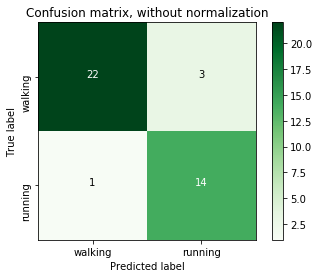

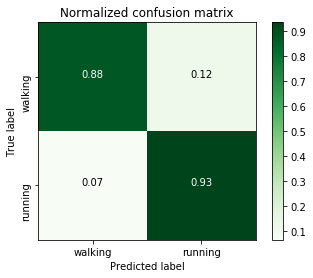

In [66]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
class_names = ["walking", "running"]
plot_confusion_matrix(cnf_matrix, classes=["walking", "running"],
                      title='Confusion matrix, without normalization')
plt.savefig('./image/confusion_matrix_multipc.png', dpi=100)
# plt.savefig('H:/mastersProject/activity_analyzer/LogisticRegression/cm_lr', dpi=1000)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()